<a href="https://colab.research.google.com/github/MauricioSuporte/Deep-Learning-Ra-a-de-Gatos/blob/master/12CatsBreed60%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
from numpy import array
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import keras
from keras import regularizers, optimizers

In [0]:
img_width, img_height = 150, 150
train_data_dir = '/content/drive/My Drive/Gatos'

nb_train_samples = 1928  
nb_validation_samples = 482 
epochs = 200
batch_size = 128
if K.image_data_format() == 'wa':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
datagen = ImageDataGenerator(
    width_shift_range=(0.3, 1.4),
    height_shift_range=(0.3, 1.4),
    channel_shift_range=0.3,
    vertical_flip=True,
    brightness_range=(0.3, 1.4),
    fill_mode="nearest",
    rescale=1./255,
    rotation_range=180,
    zoom_range=[0.9, 1.25],
    validation_split=0.2,
    shear_range=0.5
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)


validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 1928 images belonging to 12 classes.
Found 482 images belonging to 12 classes.


In [0]:
classifier = keras.Sequential()

classifier.add(keras.layers.Conv2D(40, (3, 3), input_shape = [150,150,3], activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

classifier.add(keras.layers.Conv2D(80, (5, 5), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

classifier.add(keras.layers.Conv2D(120, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
classifier.add(keras.layers.Dropout(0.25))

classifier.add(keras.layers.Conv2D(80, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))


classifier.add(keras.layers.Flatten())

classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(keras.layers.Dropout(0.25))

classifier.add(keras.layers.Dense(units = 12, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

In [0]:
hist = classifier.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=epochs
)

W0815 18:47:54.397296 140015490099072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
15/15 [==============================] - 777s 52s/step - loss: 2.4889 - acc: 0.0865 - val_loss: 2.4845 - val_acc: 0.1068
Epoch 2/200
15/15 [==============================] - 22s 1s/step - loss: 2.4806 - acc: 0.1036 - val_loss: 2.4653 - val_acc: 0.1102
Epoch 3/200
15/15 [==============================] - 20s 1s/step - loss: 2.4625 - acc: 0.1051 - val_loss: 2.4348 - val_acc: 0.1271
Epoch 4/200
15/15 [==============================] - 20s 1s/step - loss: 2.4440 - acc: 0.1224 - val_loss: 2.4072 - val_acc: 0.1723
Epoch 5/200
15/15 [==============================] - 20s 1s/step - loss: 2.4457 - acc: 0.1355 - val_loss: 2.3766 - val_acc: 0.1458
Epoch 6/200
15/15 [==============================] - 20s 1s/step - loss: 2.4098 - acc: 0.1538 - val_loss: 2.3786 - val_acc: 0.1638
Epoch 7/200
15/15 [==============================] - 21s 1s/step - loss: 2.3885 - acc: 0.1538 - val_loss: 2.2984 - val_acc: 0.1780
Epoch 8/200
15/15 [==============================] - 20s 1s/step - loss: 2.3565 -

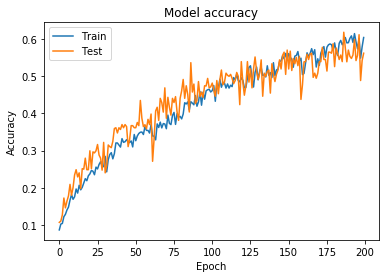

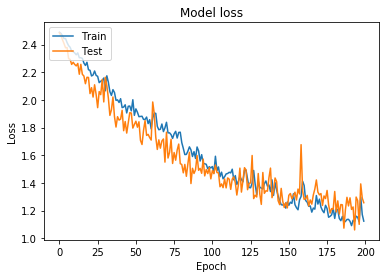

In [0]:
# Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()